In [1]:
# millions of words addressed to child 
def input_voc(month):
    '''finds the number of words a typical middle class child hears at a given age (in months)'''
    return 0.625*month*1000000

In [2]:
import pandas as pd

In [3]:
word_data = pd.read_csv("per_word_data.csv")
word_data

,num_item_id,definition,type,category,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1,baa baa,word,sounds,0.47,0.57,0.61,0.69,0.70,0.63,0.78,0.77,0.79,0.81,0.83,0.82,0.90,0.86,0.92
1,2,choo choo,word,sounds,0.28,0.33,0.51,0.59,0.61,0.59,0.74,0.78,0.80,0.84,0.86,0.85,0.95,0.87,0.93
2,3,cockadoodledoo,word,sounds,0.13,0.11,0.19,0.25,0.27,0.34,0.39,0.39,0.51,0.53,0.55,0.53,0.75,0.57,0.73
3,4,grrr,word,sounds,0.54,0.57,0.63,0.66,0.66,0.64,0.75,0.80,0.83,0.80,0.86,0.81,0.94,0.83,0.89
4,5,meow,word,sounds,0.50,0.49,0.68,0.72,0.73,0.79,0.82,0.87,0.90,0.90,0.94,0.91,0.97,0.93,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,676,because,word,connecting_words,0.00,0.00,0.01,0.02,0.03,0.04,0.10,0.13,0.12,0.15,0.27,0.30,0.37,0.42,0.49
676,677,but,word,connecting_words,0.00,0.00,0.00,0.01,0.02,0.04,0.04,0.05,0.07,0.11,0.17,0.23,0.25,0.27,0.39
677,678,if,word,connecting_words,0.00,0.01,0.00,0.01,0.01,0.02,0.02,0.03,0.04,0.10,0.08,0.12,0.19,0.20,0.23
678,679,so,word,connecting_words,0.00,0.01,0.01,0.02,0.03,0.05,0.06,0.10,0.10,0.15,0.20,0.25,0.29,0.30,0.38


<AxesSubplot:ylabel='Frequency'>

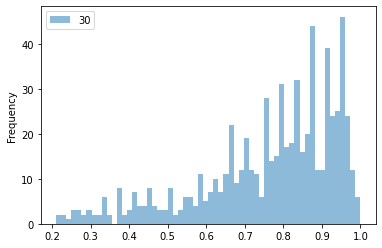

In [4]:
import statistics
l = len(word_data)+1
word_data[["30"]].plot.hist(bins=60, alpha=0.5)

In [49]:
len(word_data[word_data["30"]>0.5])
## approximate number of words a kid should know

603

In [6]:
# find unique words in the CHILDES
# with open("corpora/000_bi.txt") as file:
#     bi = file.read().split("\n")
#     bi_text = []
#     for sentence in bi:
#         words = sentence.split(" ")
#         if words:
#             bi_text+=words
    
with open("corpora/000_dev.txt") as file:
    dev = file.read().split("\n")
    dev_text = []
    for sentence in dev:
        words = sentence.split(" ")
        if words:
            dev_text+=words

In [7]:
corpus_size = len(dev_text)
corpus_size

5062333

In [23]:
import nltk
from nltk.probability import FreqDist

# bi_freq = nltk.FreqDist(bi_text)
dev_freq = nltk.FreqDist(dev_text)
dev_freq.pop("",None)

# bi_freq.pop("",None)
# bi_freq.plot(25, cumulative=False)

100786

<AxesSubplot:ylabel='Frequency'>

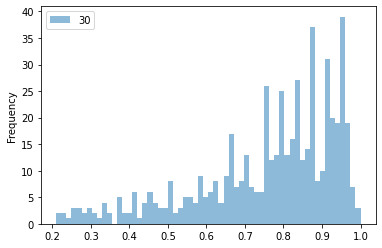

In [24]:
selected_words = []     # words selected from CDI
for word in word_data["definition"]:
    if word in dev_freq:
        selected_words.append(word)

seletced_word_data = word_data[word_data["definition"].isin(selected_words)]
l = len(seletced_word_data)+1
seletced_word_data[["30"]].plot.hist(bins=60, alpha=0.5)

In [25]:
len(seletced_word_data[seletced_word_data["30"]>0.8])
## approximate number of words a kid should know

275

In [26]:
len(word_data)

680

In [27]:
len(selected_words)

544

In [28]:
selected_words_freq = {k: v/corpus_size for k, v in dev_freq.items() if k in selected_words}
selected_words_freq

{'she': 0.005017449464505792,
 'the': 0.038272867470393594,
 'bear': 0.0006894054579183155,
 'cup': 0.0006585896265615083,
 'you': 0.0515726642241828,
 'for': 0.004815171186881621,
 'some': 0.004187594929057413,
 'help': 0.000801804227418465,
 'me': 0.004504444887367148,
 'to': 0.015251466073053669,
 'hold': 0.0006518733556247682,
 'them': 0.003503522980412391,
 'I': 0.013664055683417112,
 'were': 0.0012180154881158548,
 'hand': 0.0009859090660373389,
 'cold': 0.00032968988804173887,
 'about': 0.002039573453583555,
 'where': 0.0033581354683700185,
 'do': 0.015787187448948935,
 'we': 0.009739778082556006,
 'put': 0.006801409547732241,
 'it': 0.025398961308945894,
 'are': 0.010067097522031838,
 'look': 0.007791466898759919,
 'at': 0.004745835566328805,
 'all': 0.004312241016148089,
 'eat': 0.0018157636014857182,
 'same': 0.00026746561318664733,
 'what': 0.016993745768996232,
 'have': 0.006359715964951338,
 'on': 0.011744584957172908,
 'more': 0.0022379009835978786,
 'there': 0.0102332264

In [29]:
import math
selected_words_occ_24 = {k:math.ceil(v*input_voc(24)) for k,v in selected_words_freq.items()}
selected_words_occ_24

{'she': 75262,
 'the': 574094,
 'bear': 10342,
 'cup': 9879,
 'you': 773590,
 'for': 72228,
 'some': 62814,
 'help': 12028,
 'me': 67567,
 'to': 228772,
 'hold': 9779,
 'them': 52553,
 'I': 204961,
 'were': 18271,
 'hand': 14789,
 'cold': 4946,
 'about': 30594,
 'where': 50373,
 'do': 236808,
 'we': 146097,
 'put': 102022,
 'it': 380985,
 'are': 151007,
 'look': 116873,
 'at': 71188,
 'all': 64684,
 'eat': 27237,
 'same': 4012,
 'what': 254907,
 'have': 95396,
 'on': 176169,
 'more': 33569,
 'there': 153499,
 'that': 288244,
 'motorcycle': 771,
 'is': 235475,
 'here': 110917,
 'he': 110007,
 'see': 100196,
 'him': 31436,
 'my': 37759,
 'dinner': 3912,
 'which': 10688,
 'mine': 2407,
 'chocolate': 2635,
 'like': 110828,
 'get': 72391,
 'and': 249117,
 'no': 175989,
 'give': 18982,
 'her': 46455,
 'with': 86510,
 'not': 74394,
 'now': 69961,
 'so': 53250,
 'your': 3707,
 'go': 133949,
 'plate': 5284,
 'of': 95349,
 'how': 32354,
 'green': 10881,
 'be': 54921,
 'boy': 22336,
 'make': 2990

In [30]:
prob_24 = dict(zip(word_data["definition"].to_list(), word_data["24"].to_list()))
selected_prob_24 = {k:v for k,v in prob_24.items() if k in selected_words}
selected_prob_24

{'moo': 0.9,
 'ouch': 0.84,
 'alligator': 0.46,
 'animal': 0.56,
 'ant': 0.5,
 'bear': 0.79,
 'bee': 0.72,
 'bird': 0.88,
 'bug': 0.73,
 'bunny': 0.75,
 'butterfly': 0.64,
 'cat': 0.85,
 'cow': 0.79,
 'deer': 0.39,
 'dog': 0.93,
 'donkey': 0.32,
 'duck': 0.87,
 'elephant': 0.67,
 'frog': 0.71,
 'giraffe': 0.58,
 'goose': 0.35,
 'hen': 0.22,
 'horse': 0.79,
 'kitty': 0.79,
 'lamb': 0.39,
 'lion': 0.64,
 'monkey': 0.75,
 'moose': 0.28,
 'mouse': 0.62,
 'owl': 0.55,
 'penguin': 0.37,
 'pig': 0.77,
 'pony': 0.31,
 'puppy': 0.73,
 'rooster': 0.32,
 'sheep': 0.6,
 'squirrel': 0.49,
 'tiger': 0.57,
 'turkey': 0.4,
 'turtle': 0.66,
 'wolf': 0.28,
 'zebra': 0.5,
 'airplane': 0.79,
 'bicycle': 0.69,
 'boat': 0.76,
 'bus': 0.76,
 'car': 0.91,
 'helicopter': 0.5,
 'motorcycle': 0.45,
 'sled': 0.24,
 'stroller': 0.49,
 'tractor': 0.48,
 'train': 0.79,
 'tricycle': 0.26,
 'truck': 0.85,
 'ball': 0.96,
 'balloon': 0.87,
 'bat': 0.42,
 'block': 0.67,
 'book': 0.91,
 'chalk': 0.36,
 'crayon': 0.65,
 'd

In [31]:
import random as rand

def find_lr(occ, prob):
    prob = round(prob, 2)
    attempt = rand.random()
    right_bound = 1
    left_bound = 0
    while True:
        attempt_ans = 1-binom.cdf(0, occ, attempt)
        attempt_ans = round(attempt_ans,2)
#         print("%f, %f, %f"%(attempt, attempt_ans, prob))

        if attempt_ans == prob:
            return attempt
            
        elif attempt_ans < prob:
            temp = attempt
            attempt = (right_bound - attempt)/2 + attempt
            left_bound = temp
            
        else:
            temp = attempt
            attempt = attempt/2
            right_bound = temp
            

In [32]:
from scipy.stats import binom

selected_word_lr = {}
for word in selected_words:
    occ = selected_words_occ_24[word]
    prob = selected_prob_24[word]
    lr = find_lr(occ, prob)
    selected_word_lr[word] = lr

In [33]:
## check if the leanring rate was correct
def _unittest(occ, prob, lr):
    predicted_prob = 1-binom.cdf(0, occ, lr)
    print(predicted_prob)
    print(prob)
_unittest(selected_words_occ_24["egg"],selected_prob_24["egg"], selected_word_lr["egg"])

0.692531801321691
0.69


In [34]:
selected_word_lr

{'moo': 0.0003749584253960484,
 'ouch': 0.0012530947924639009,
 'alligator': 0.0013143451500089135,
 'animal': 6.461864192310814e-05,
 'ant': 0.001500205813244213,
 'bear': 0.00015040003032494326,
 'bee': 0.0003293012549923293,
 'bird': 0.0003436161923459415,
 'bug': 0.0008897619697391778,
 'bunny': 0.00023313811243408573,
 'butterfly': 0.0006135303123983578,
 'cat': 0.00021336824647492383,
 'cow': 0.00016699938713865098,
 'deer': 0.000654998028123848,
 'dog': 0.00025910051477879116,
 'donkey': 0.00026806725700568136,
 'duck': 0.00024575877767926235,
 'elephant': 0.0002223130097434643,
 'frog': 0.0003350272711392226,
 'giraffe': 0.0003781981106313908,
 'goose': 0.0003248152004647531,
 'hen': 0.00023534864609315437,
 'horse': 0.00019568475271402827,
 'kitty': 0.00019452310336225636,
 'lamb': 0.0003076466268454672,
 'lion': 0.00030211793731514365,
 'monkey': 0.00025808780974071333,
 'moose': 0.0007827499067637557,
 'mouse': 0.0003062780619661439,
 'owl': 0.0007404543248831958,
 'penguin'

In [35]:
import json
with open("lr/dev_24.json","w") as file:
    json.dump(selected_word_lr,file, indent=4)

In [36]:
## write them into one function

freq_dict = [dev_freq]
months = [16,23,30]

for corpus in freq_dict:
    for month in months:
        if corpus == dev_freq:
            corpus_name = "dev"
        else:
            corpus_name = "bi"

        month_key = str(month)

        selected_words = []     # words selected from CDI
        for word in word_data["definition"]:
            if word in corpus:
                selected_words.append(word)

        selected_words_freq = {k: v/corpus_size for k, v in corpus.items() if k in selected_words}
        input_v = input_voc(month)
        selected_words_occ = {k:math.ceil(v*input_v) for k,v in selected_words_freq.items()}
        prob = dict(zip(word_data["definition"].to_list(), word_data[month_key].to_list()))
        selected_prob = {k:v for k,v in prob.items() if k in selected_words}

        selected_word_lr = {}

        for word in selected_words:
            occ = selected_words_occ[word]
            prob = selected_prob[word]
            lr = find_lr(occ, prob)
            selected_word_lr[word] = lr

        output_file_name = "lr/" + corpus_name + "_" + month_key + ".json"

        with open(output_file_name,"w") as file:
            json.dump(selected_word_lr,file, indent=4)


In [37]:
input_voc(30)/corpus_size

3.703825884231638

In [38]:
input_voc(30)

18750000.0